In [1]:
import pandas as pd

# Leer los archivos CSV
vehicles_df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')
models_df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//modelos.csv')

# Mostrar las primeras filas de ambos DataFrames para entender su estructura
vehicles_df.head(), models_df.head()

(   price    year manufacturer                  model fuel  odometer  \
 0  22590  2010.0    chevrolet         silverado 1500  gas   71229.0   
 1  30990  2017.0       toyota   tundra double cab sr  gas   41124.0   
 2  15000  2013.0         ford               f150 xlt  gas  128000.0   
 3  35000  2019.0       toyota                 tacoma  gas   43000.0   
 4  29990  2016.0    chevrolet  colorado extended cab  gas   17302.0   
 
   transmission drive       size    type state      lat       long  
 0        other   4wd  full-size  pickup    al  32.5900 -85.480000  
 1        other   4wd  full-size  pickup    al  32.5900 -85.480000  
 2    automatic   rwd  full-size   truck    al  32.5920 -85.518900  
 3    automatic   4wd   mid-size   truck    al  32.6013 -85.443974  
 4        other   4wd   mid-size  pickup    al  32.5900 -85.480000  ,
   manufacturer model
 0        acura   ilx
 1        acura   mdx
 2        acura   rdx
 3        acura    rl
 4        acura   rlx)

In [2]:
# Agrupar por modelo y calcular el precio promedio y el número de registros para cada modelo
model_stats = vehicles_df.groupby('model').agg(
    avg_price=('price', 'mean'),
    count=('price', 'size')
).reset_index()

# Unir con el DataFrame de modelos para obtener los nombres de los fabricantes
model_stats = models_df.merge(model_stats, on='model')

# Mostrar la tabla resultante
model_stats.head()


,manufacturer,model,avg_price,count
0,acura,ilx,14988.063830,94
1,acura,mdx,14555.516330,643
2,acura,rdx,16260.982906,234
3,acura,rl,6092.790323,62
4,acura,rlx,16609.625000,16


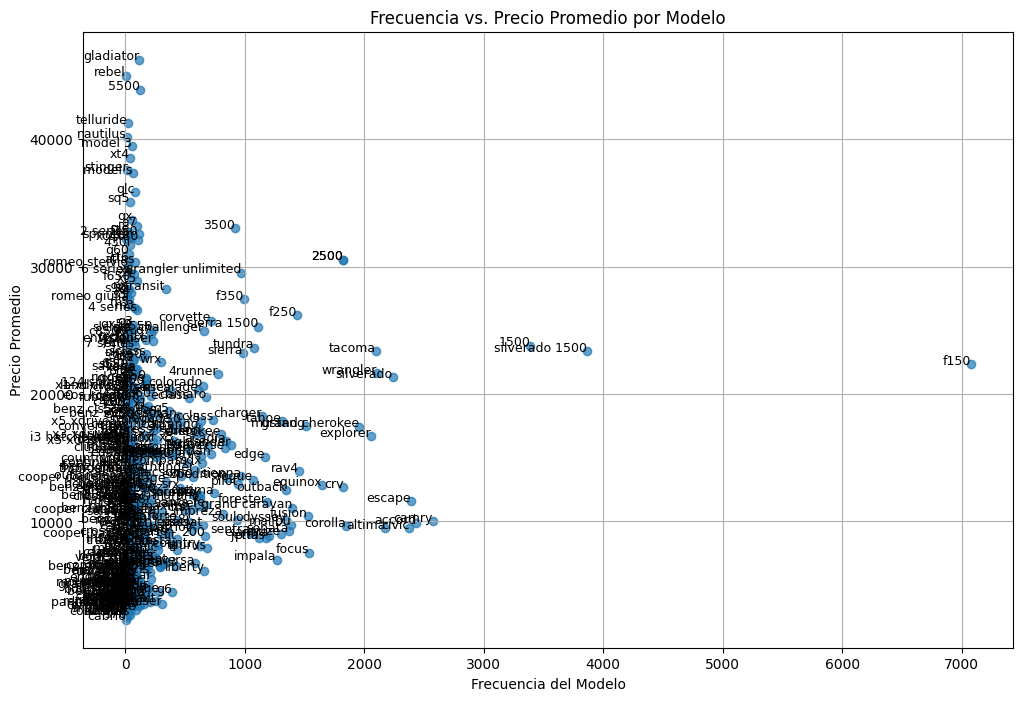

In [4]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.scatter(model_stats['count'], model_stats['avg_price'], alpha=0.7)

# Añadir etiquetas a los puntos
for i, model in enumerate(model_stats['model']):
    plt.text(model_stats['count'][i], model_stats['avg_price'][i], model, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia vs. Precio Promedio por Modelo')
plt.xlabel('Frecuencia del Modelo')
plt.ylabel('Precio Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_6568\3521519324.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


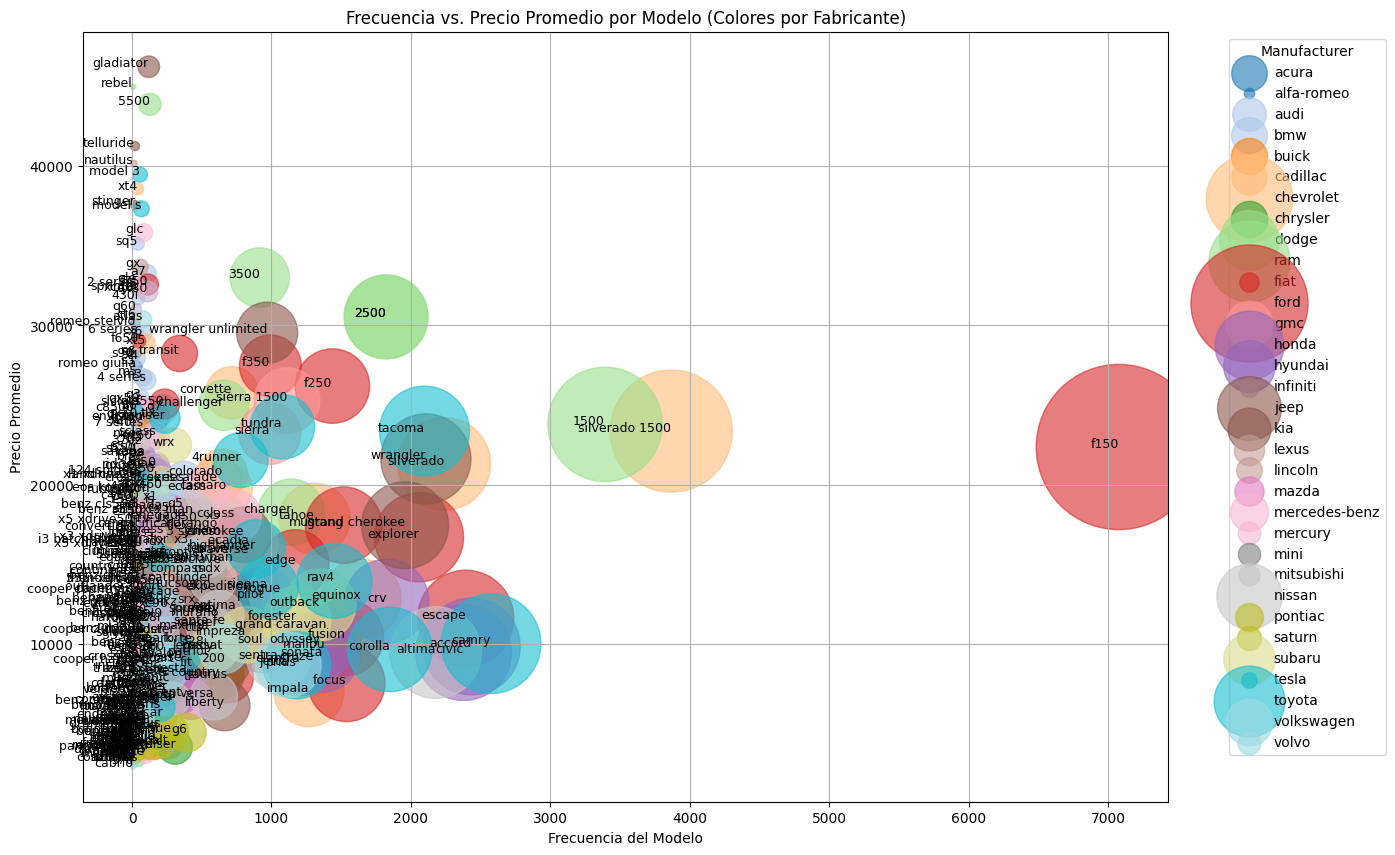

In [5]:
# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 10))
for manufacturer in manufacturers:
    subset = model_stats[model_stats['manufacturer'] == manufacturer]
    plt.scatter(
        subset['count'], subset['avg_price'], 
        s=subset['count']*2, alpha=0.6, 
        label=manufacturer, color=manufacturer_colors[manufacturer]
    )

# Añadir etiquetas a los puntos
for i, model in enumerate(model_stats['model']):
    plt.text(model_stats['count'][i], model_stats['avg_price'][i], model, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia vs. Precio Promedio por Modelo (Colores por Fabricante)')
plt.xlabel('Frecuencia del Modelo')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_6568\3731051978.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


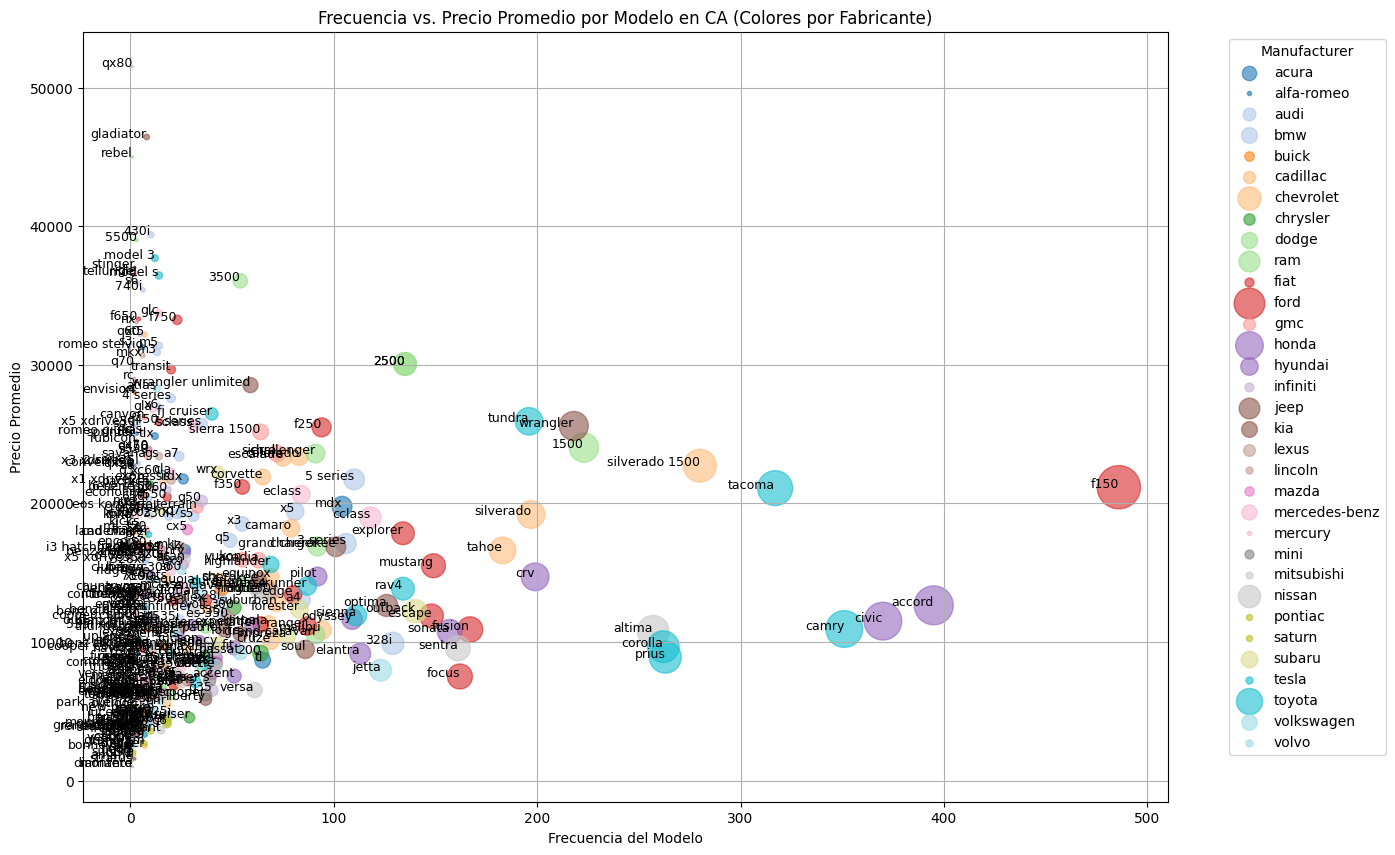

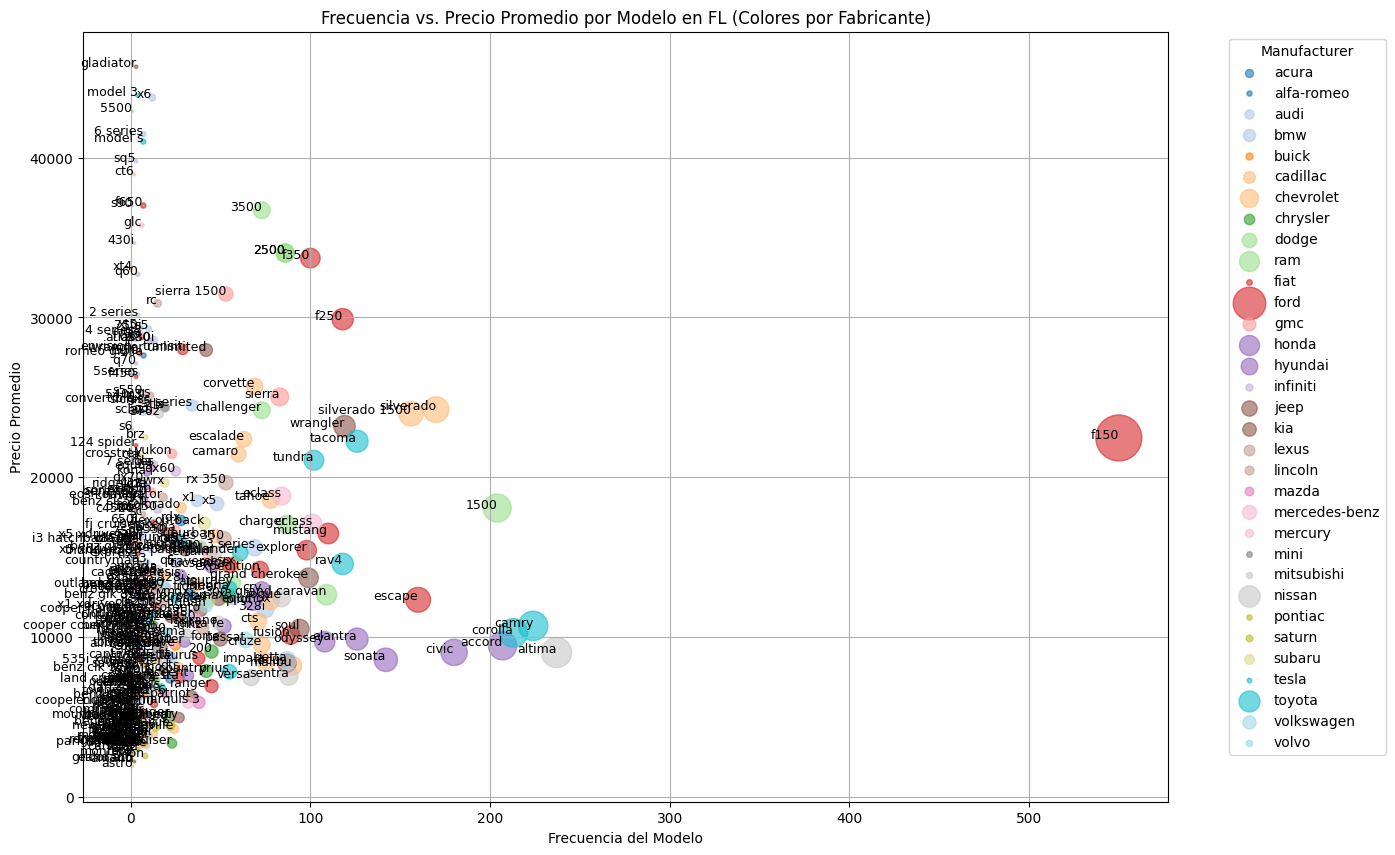

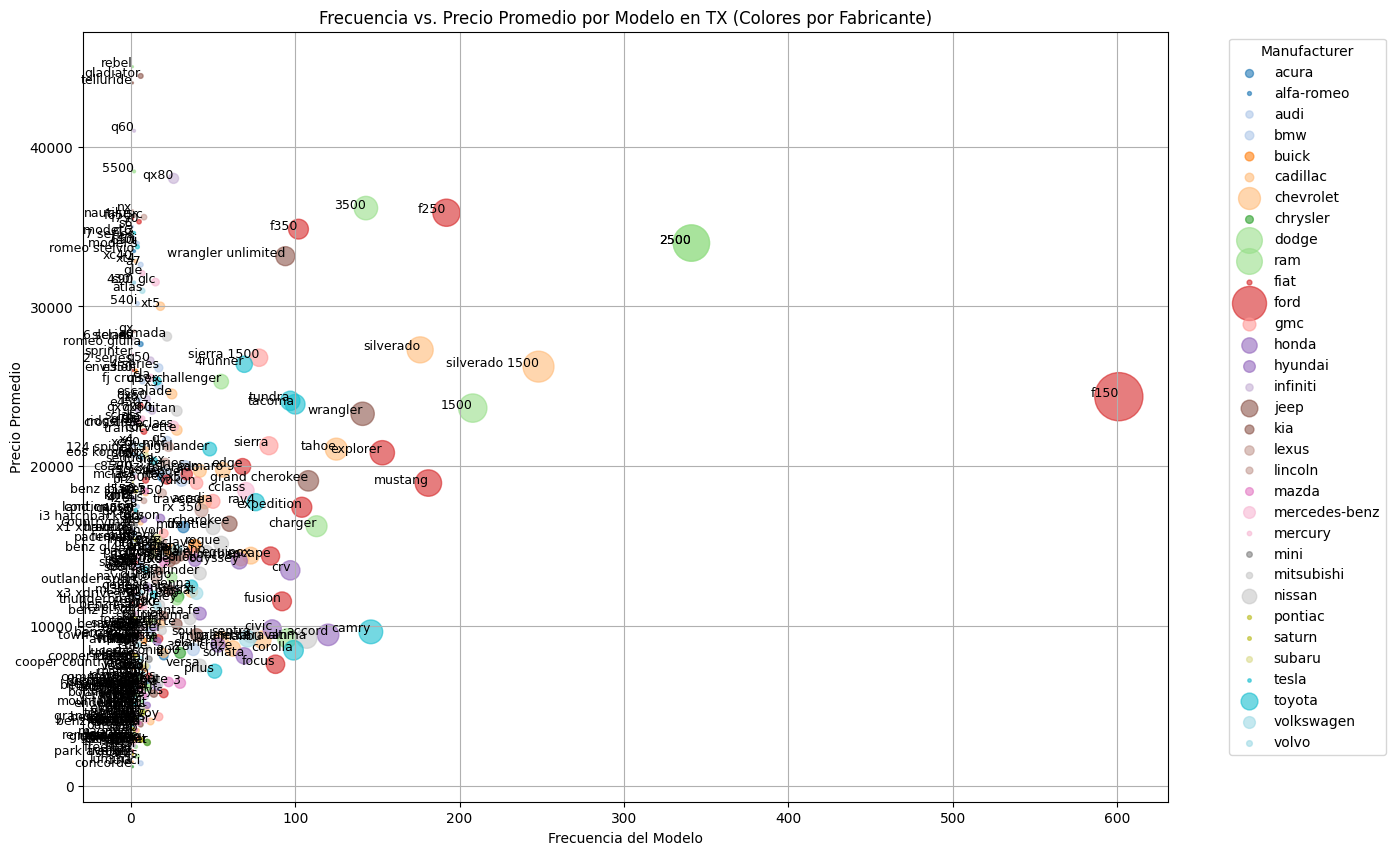

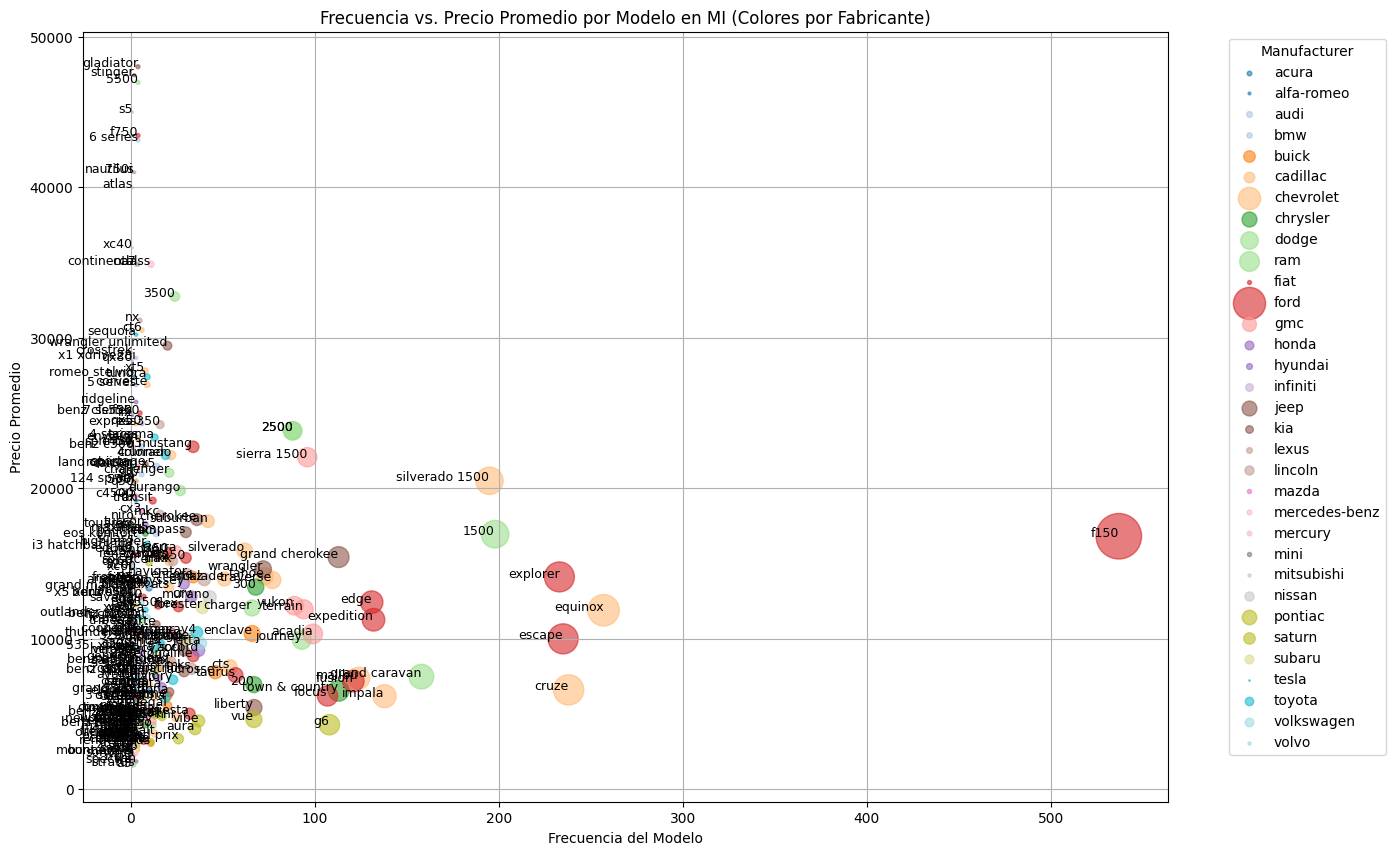

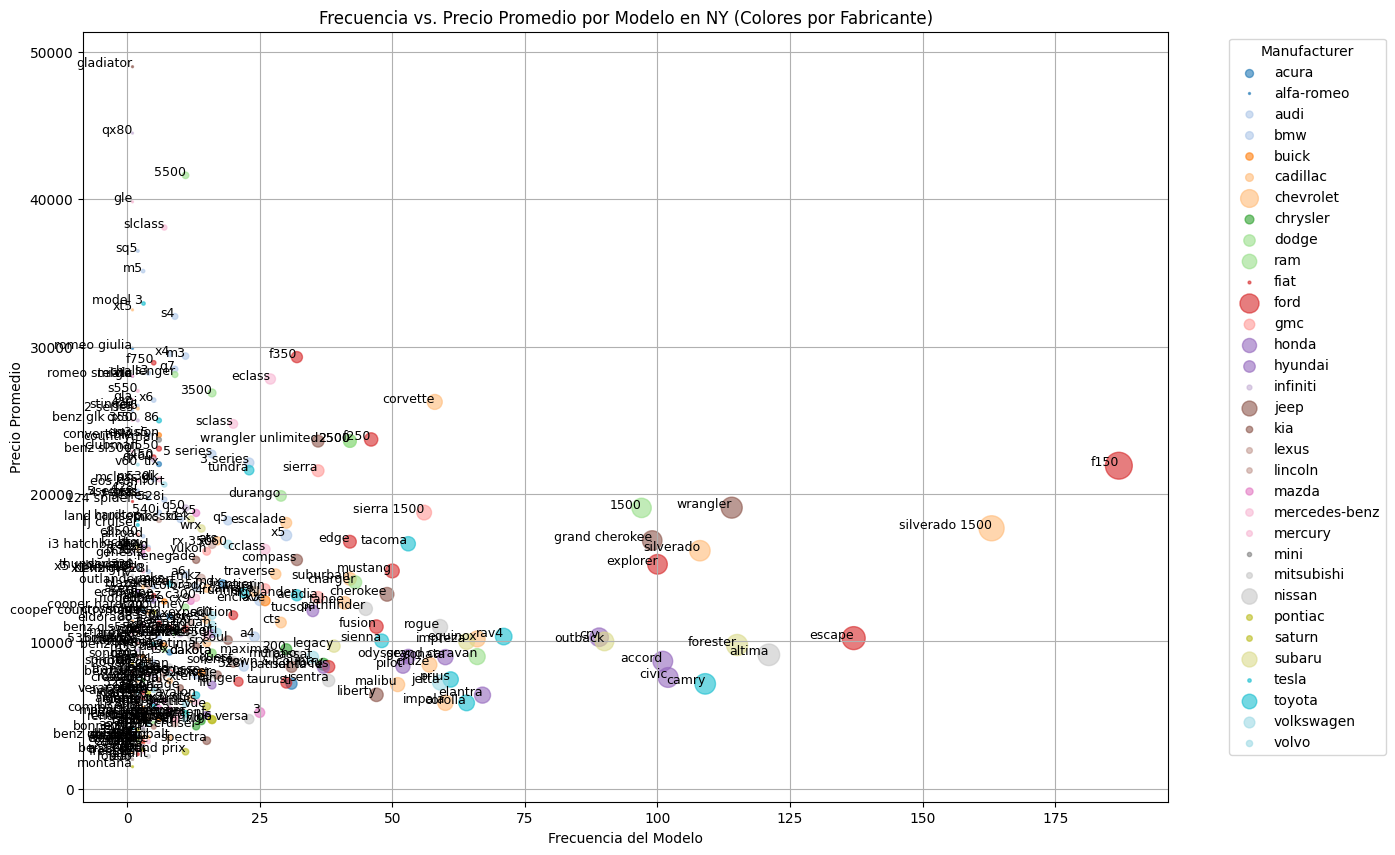

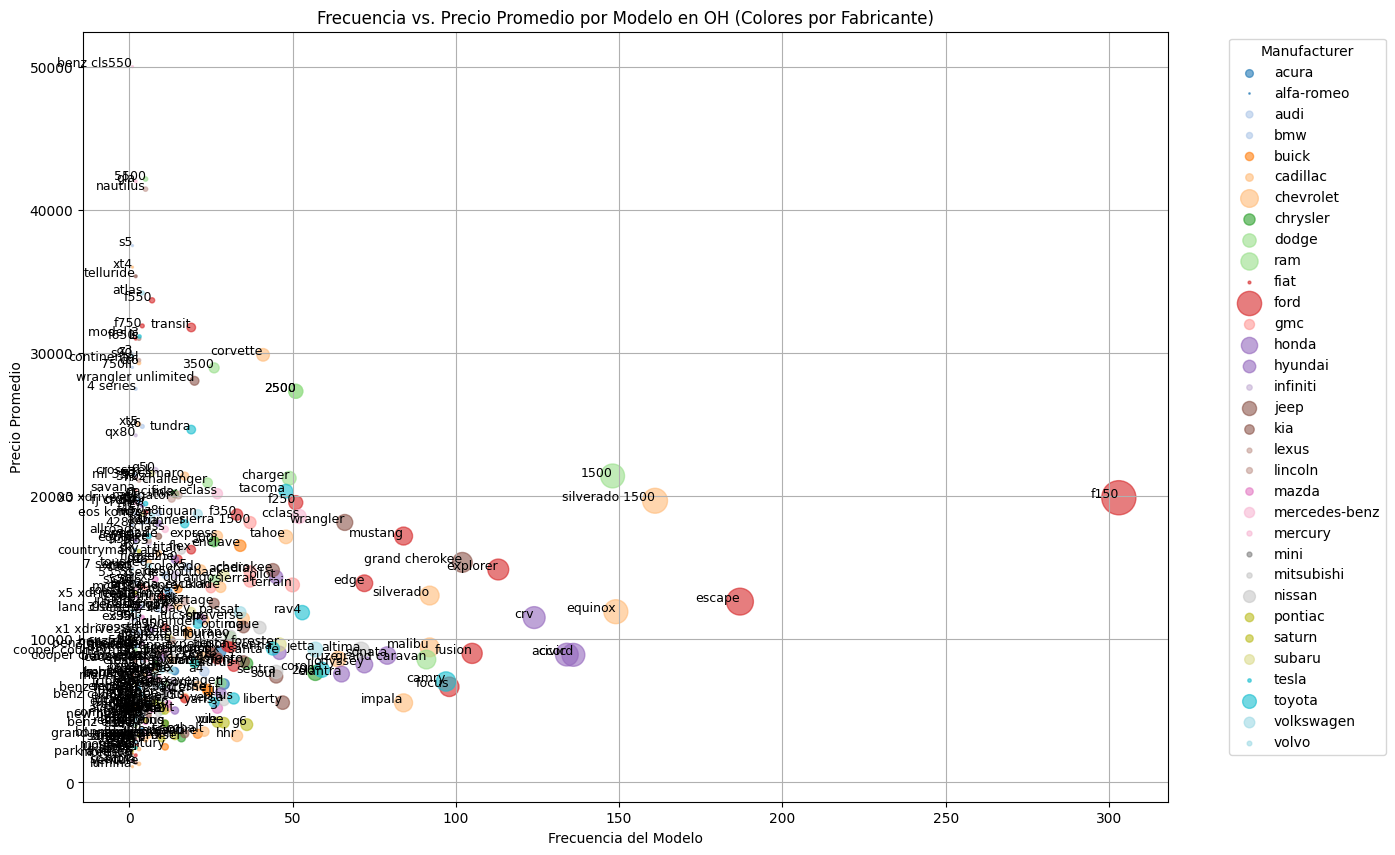

In [6]:
# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtrar datos por estado y crear gráficos de burbujas
for state in states:
    state_data = vehicles_df[vehicles_df['state'] == state]
    model_stats_state = state_data.groupby('model').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='model')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['model']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo en {state.upper()} (Colores por Fabricante)')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_6568\670857330.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


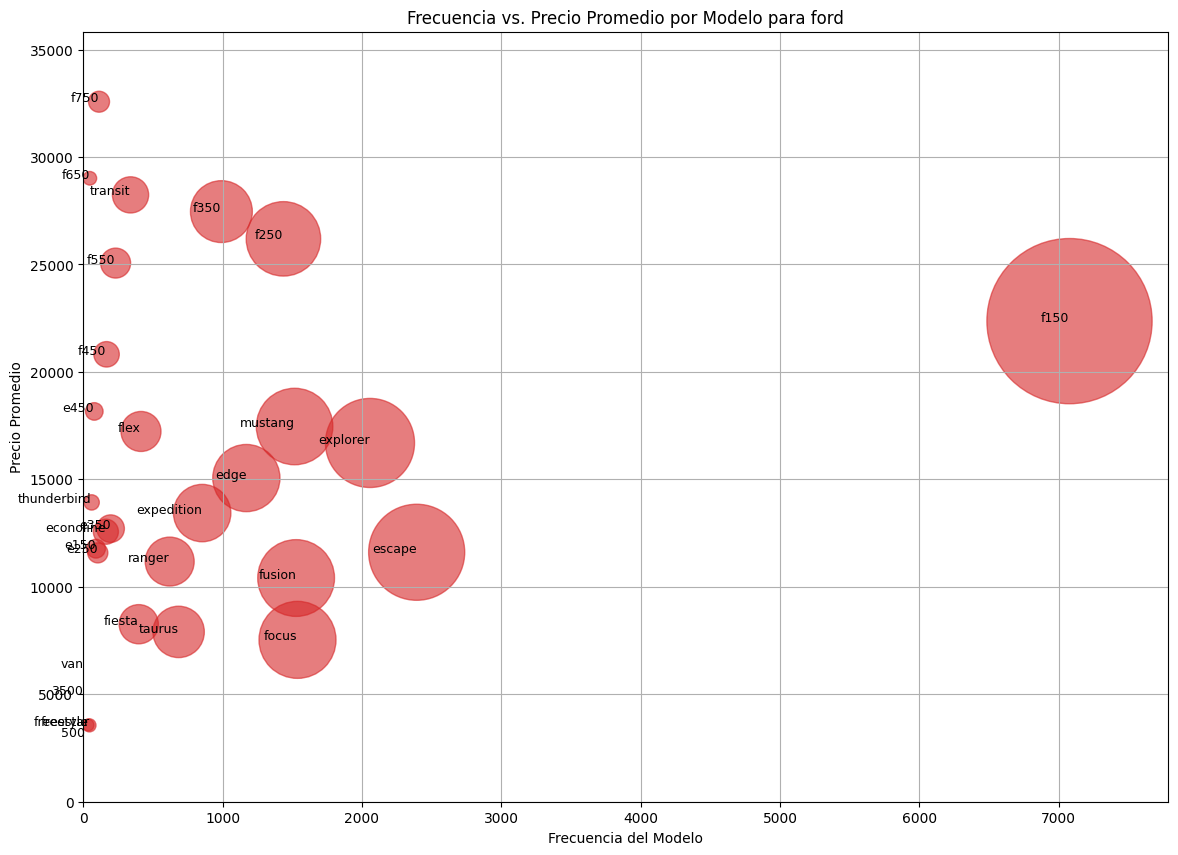

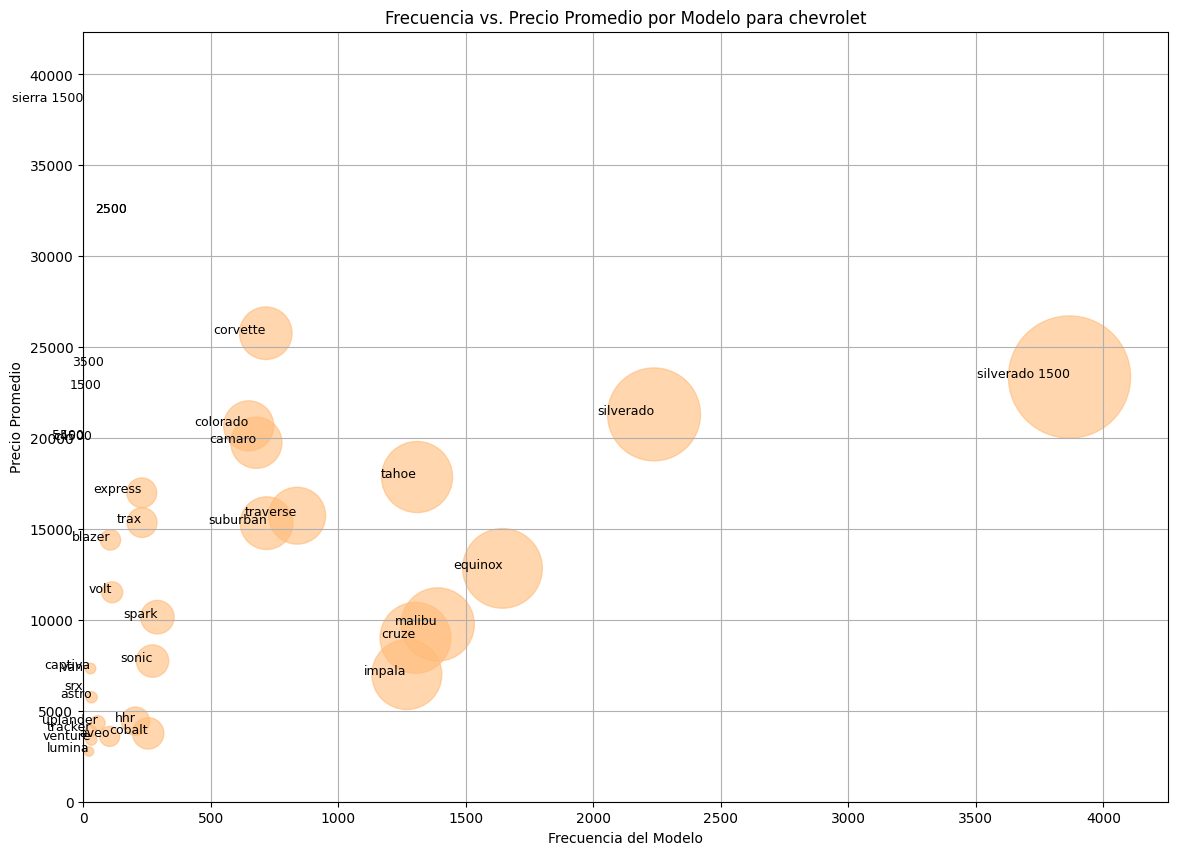

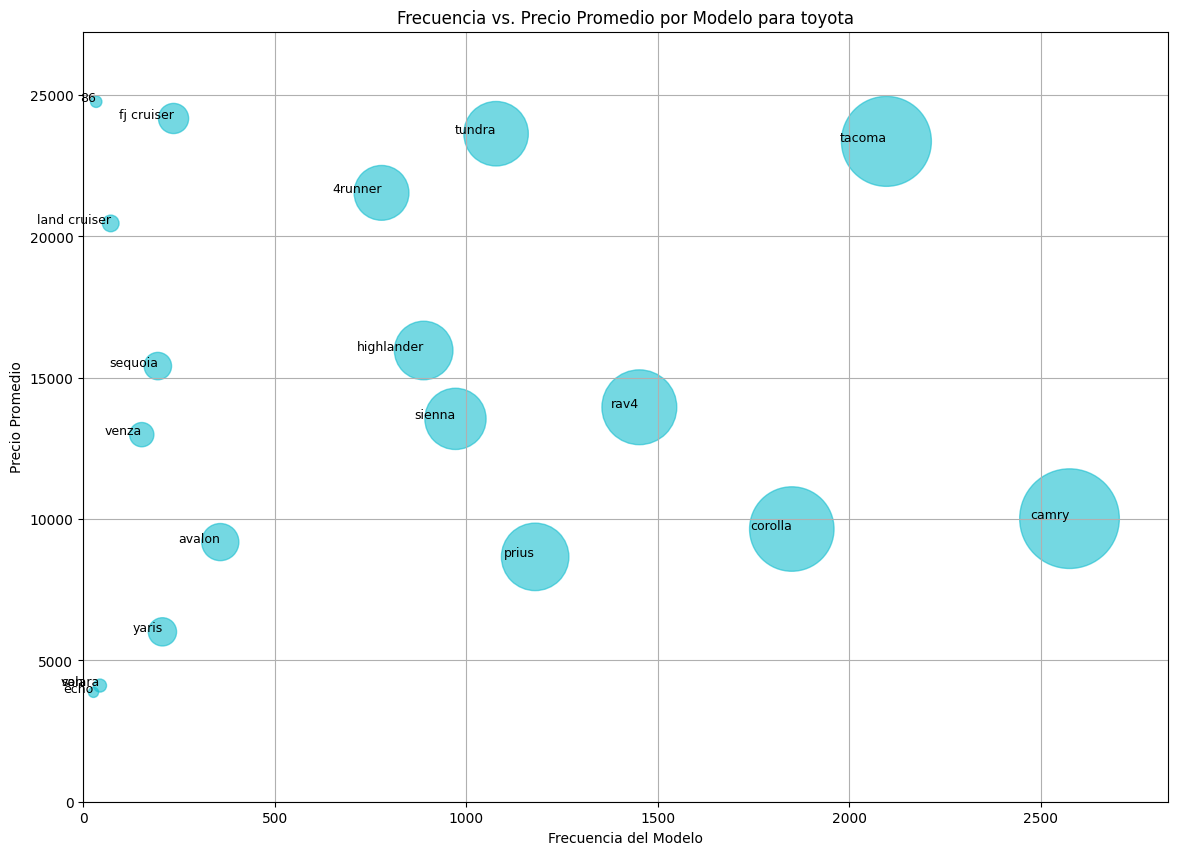

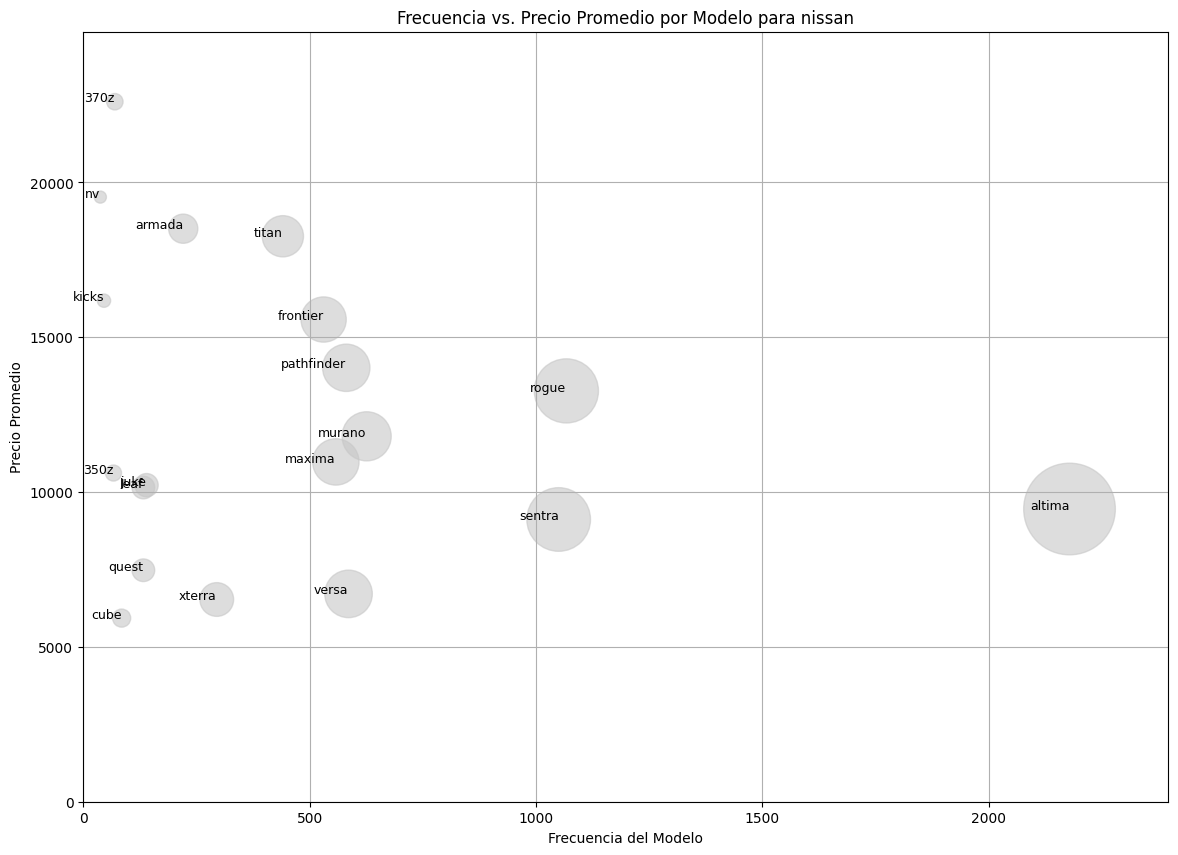

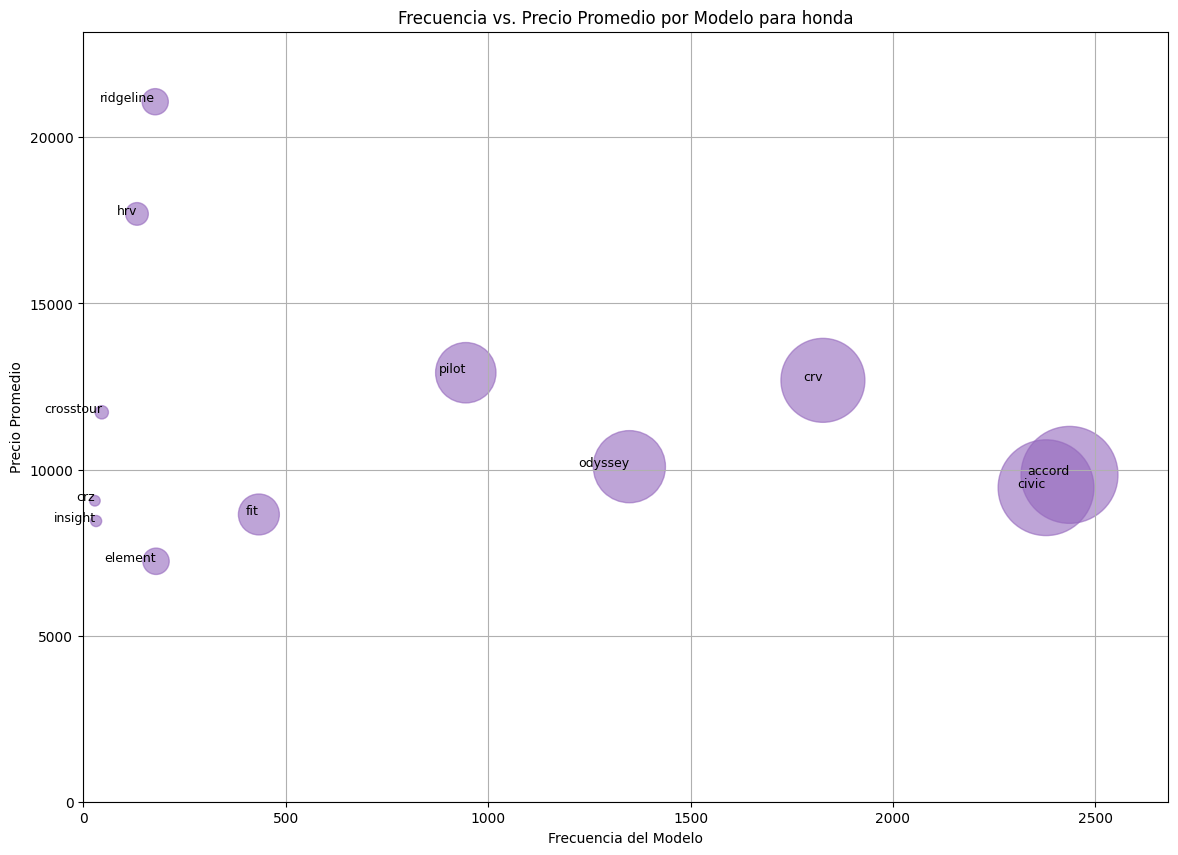

In [25]:
# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
manufacturers = ['ford', 'chevrolet', 'toyota', 'nissan', 'honda']

# Filtrar datos por estado y crear gráficos de burbujas
for man in manufacturers:
    state_data = vehicles_df[vehicles_df['manufacturer'] == man]
    model_stats_state = state_data.groupby('model').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='model')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['model']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo para {man}')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    #plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar límites de los ejes
    plt.xlim(0, model_stats_state['count'].max() * 1.1)
    plt.ylim(0, model_stats_state['avg_price'].max() * 1.1)
    
    plt.show()



C:\Users\sergi\AppData\Local\Temp\ipykernel_6568\1289197041.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


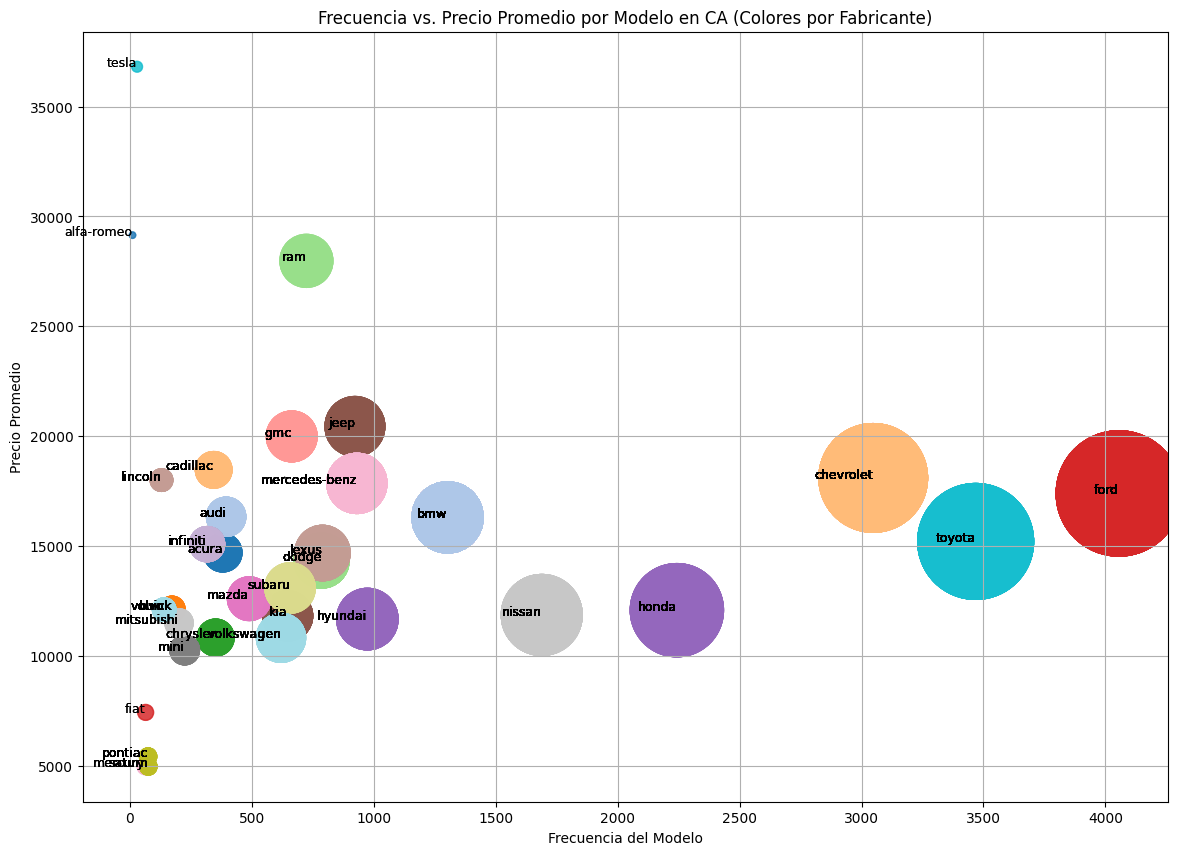

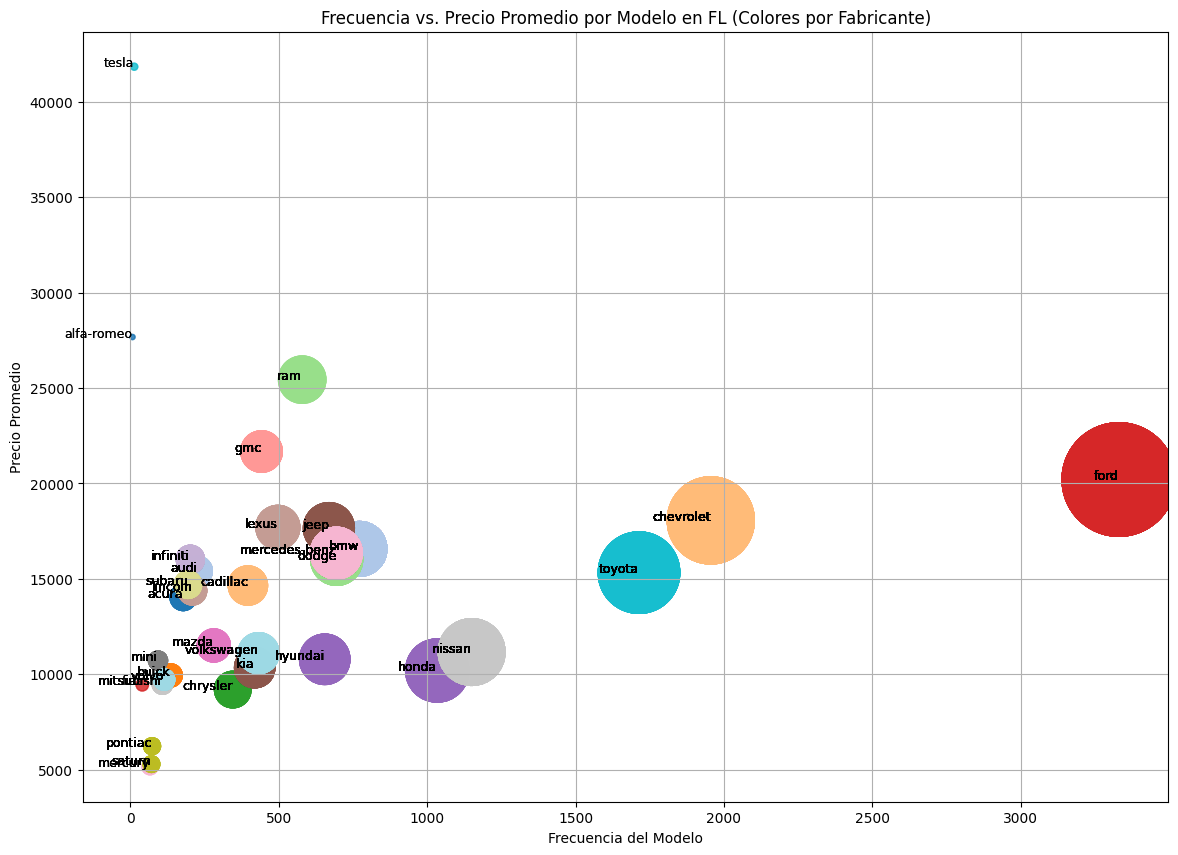

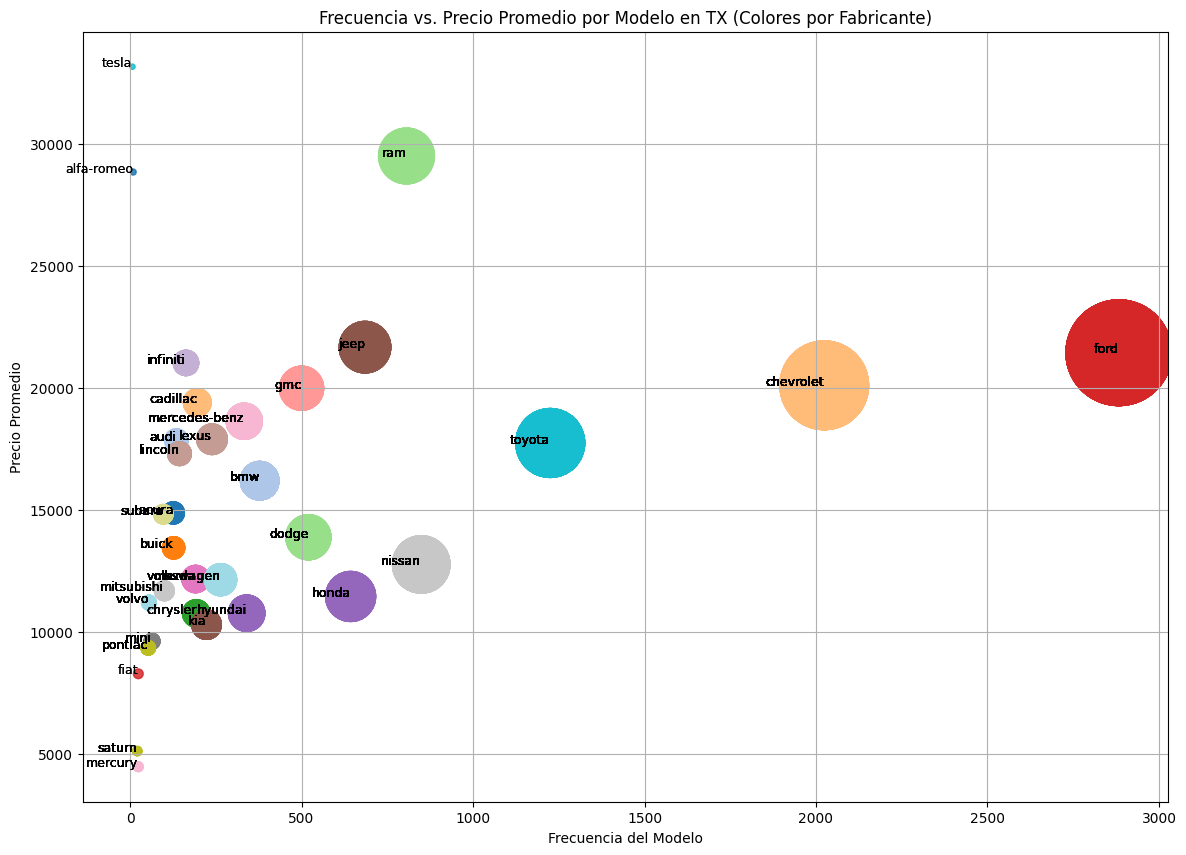

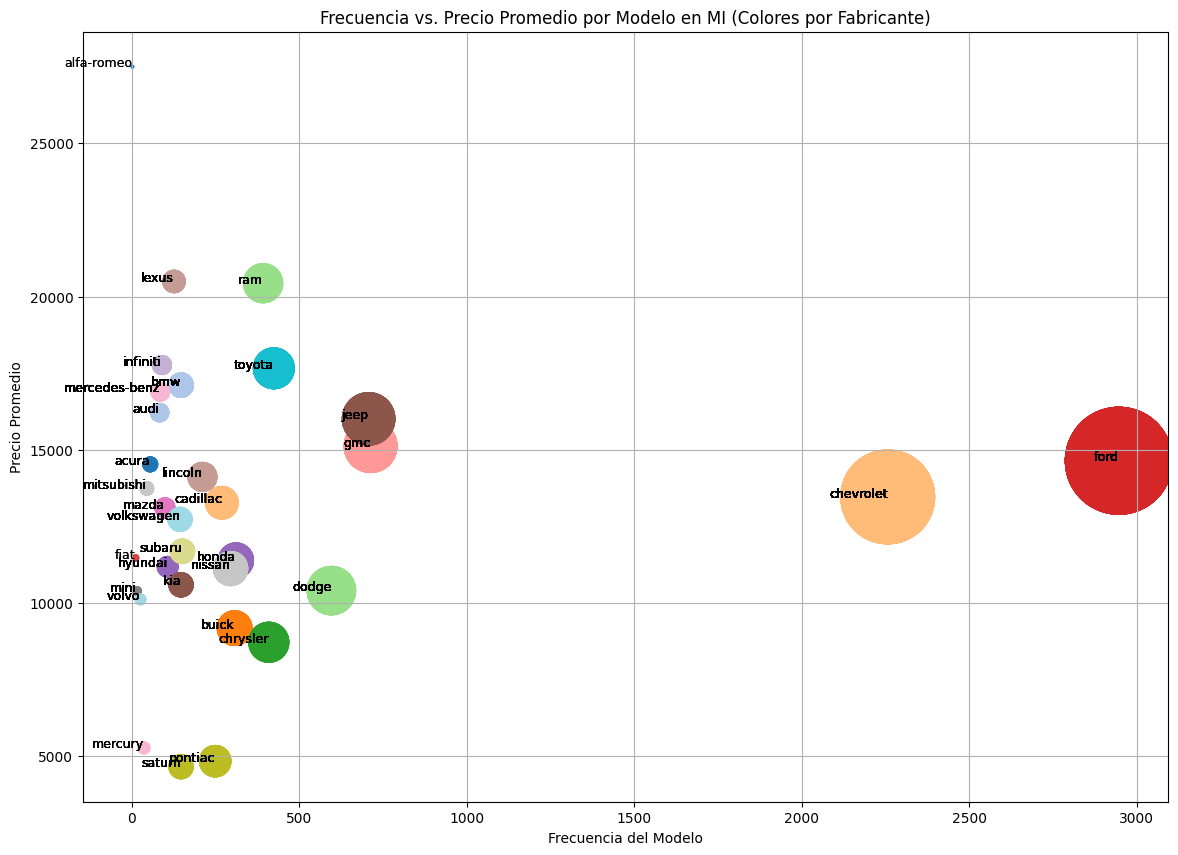

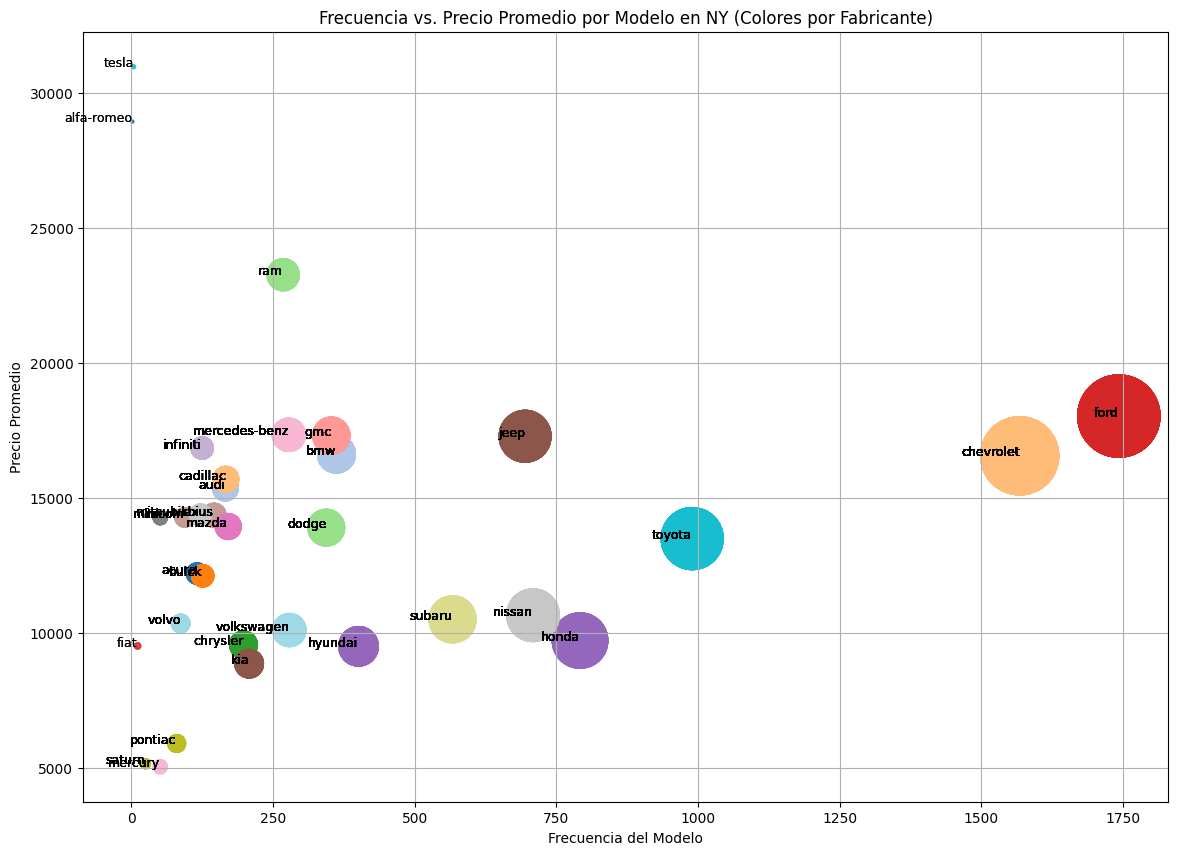

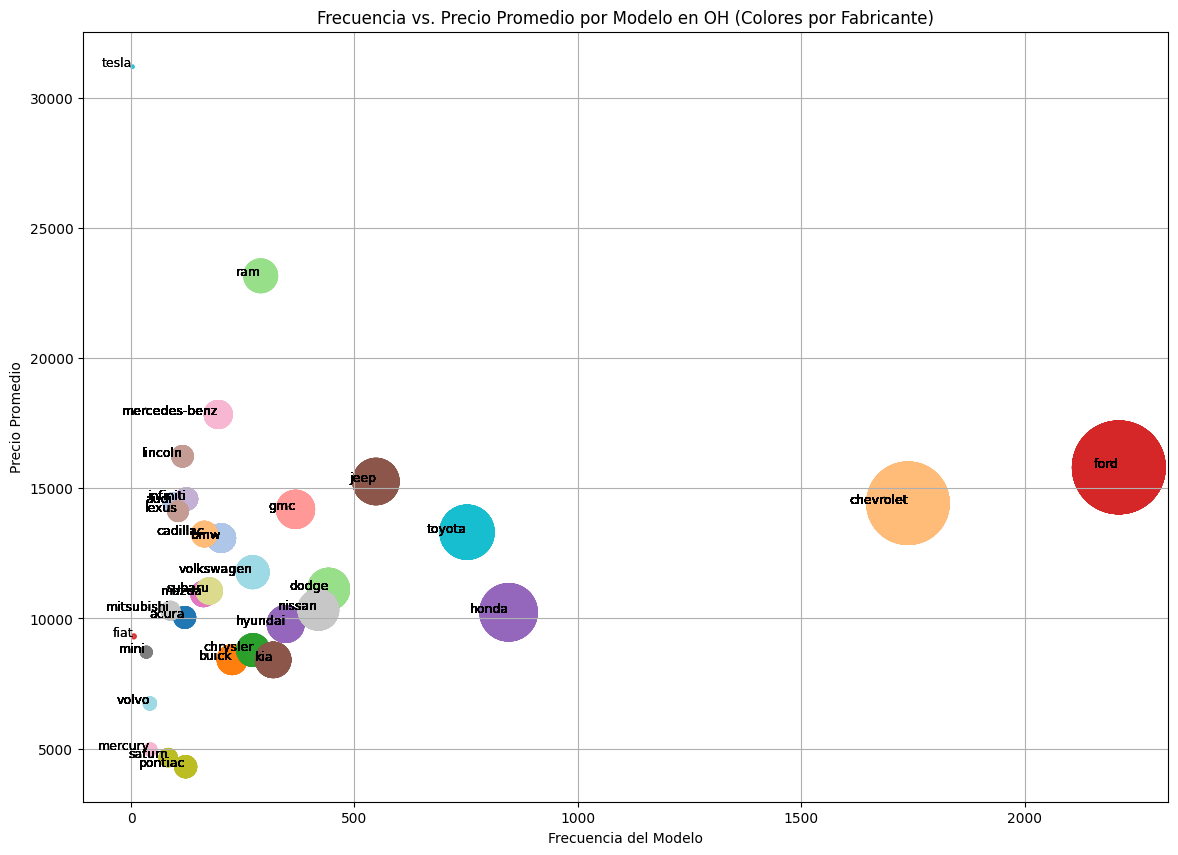

In [19]:
# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Lista de estados a filtrar
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtrar datos por estado y crear gráficos de burbujas
for state in states:
    state_data = vehicles_df[vehicles_df['state'] == state]
    model_stats_state = state_data.groupby('manufacturer').agg(
        avg_price=('price', 'mean'),
        count=('price', 'size')
    ).reset_index()
    model_stats_state = models_df.merge(model_stats_state, on='manufacturer')
    
    plt.figure(figsize=(14, 10))
    for manufacturer in manufacturers:
        subset = model_stats_state[model_stats_state['manufacturer'] == manufacturer]
        plt.scatter(
            subset['count'], subset['avg_price'], 
            s=subset['count']*2, alpha=0.6, 
            label=manufacturer, color=manufacturer_colors[manufacturer]
        )
    
    for i, model in enumerate(model_stats_state['manufacturer']):
        plt.text(model_stats_state['count'][i], model_stats_state['avg_price'][i], model, fontsize=9, ha='right')
    
    plt.title(f'Frecuencia vs. Precio Promedio por Modelo en {state.upper()} (Colores por Fabricante)')
    plt.xlabel('Frecuencia del Modelo')
    plt.ylabel('Precio Promedio')
    plt.grid(True)
    #plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_6568\735698979.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(manufacturers))


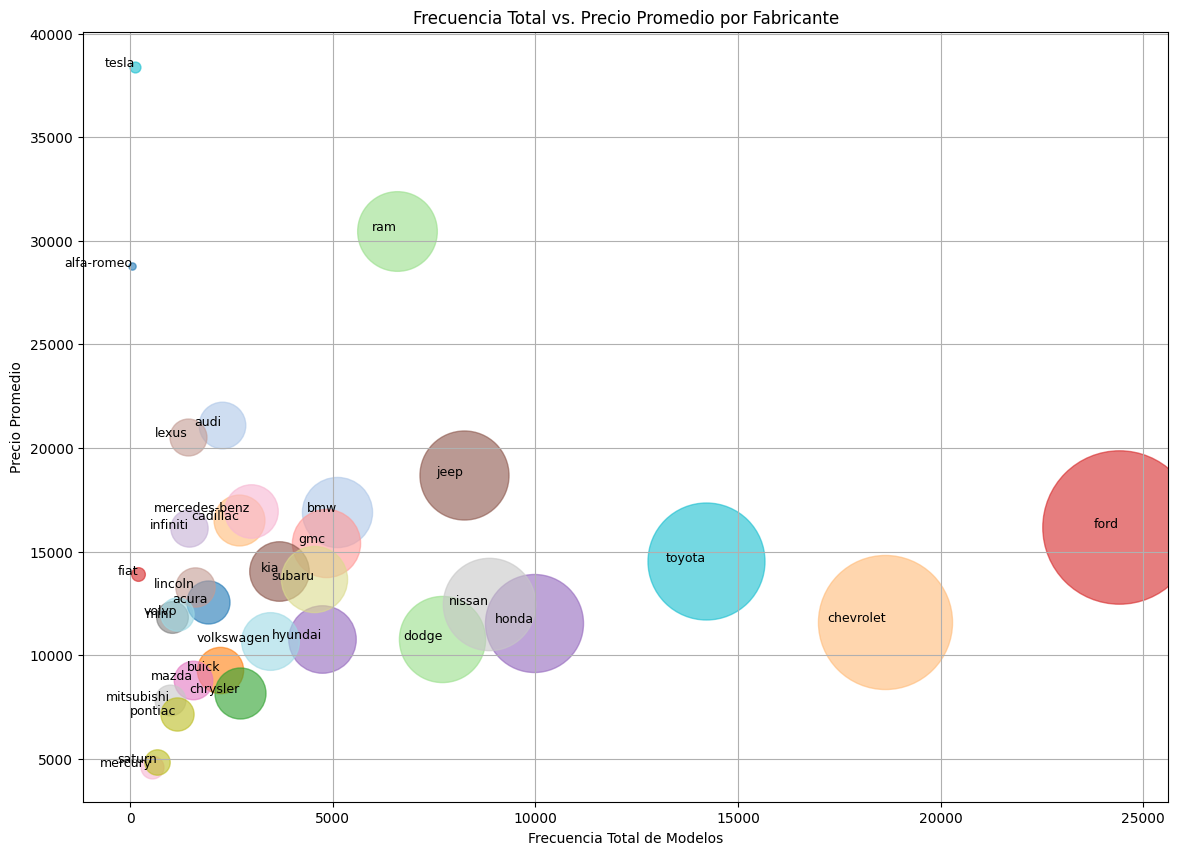

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Crear un mapa de colores para los fabricantes
manufacturers = model_stats['manufacturer'].unique()
colors = plt.cm.get_cmap('tab20', len(manufacturers))

# Crear un diccionario para asignar un color a cada fabricante
manufacturer_colors = {manufacturer: colors(i) for i, manufacturer in enumerate(manufacturers)}

# Agrupar por fabricante para calcular el promedio de precios y la suma de frecuencias
manufacturer_stats = model_stats.groupby('manufacturer').agg(
    avg_price=('avg_price', 'mean'),
    total_count=('count', 'sum')
).reset_index()

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 10))
for manufacturer in manufacturers:
    subset = manufacturer_stats[manufacturer_stats['manufacturer'] == manufacturer]
    plt.scatter(
        subset['total_count'], subset['avg_price'], 
        s=subset['total_count']*0.5, alpha=0.6, 
        label=manufacturer, color=manufacturer_colors[manufacturer]
    )

# Añadir etiquetas a los puntos
for i, manufacturer in enumerate(manufacturer_stats['manufacturer']):
    plt.text(manufacturer_stats['total_count'][i], manufacturer_stats['avg_price'][i], manufacturer, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Frecuencia Total vs. Precio Promedio por Fabricante')
plt.xlabel('Frecuencia Total de Modelos')
plt.ylabel('Precio Promedio')
plt.grid(True)
#plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()
